In [623]:
###################### 1. Set up the notebook ##############################

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os
import pandas as pd
import seaborn as sns
from time import time
import logging

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Save the figures
PROJECT_ROOT_DIR = "."
SECTION_ID = "end_to_end_project"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", SECTION_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [586]:
############# 2. Load the data  ###########################################

iris = pd.read_csv("C:\\Users\\amitava\\Desktop\\MachineLearning\\datasets\\Iris.csv")
#
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [587]:
####################### 3. Explore and preprocess the dataset  #######################
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [588]:
############### Notes ########################################

# Note that [1] there is no null or missing values; 
# [2] Id column need to be removed from further analyses

In [589]:
############ 4. Keep the original iris dataset and preprocess the data on a copy  ############

iris_copy = iris
iris_copy.drop('Id',axis=1,inplace=1) # The Id column removed

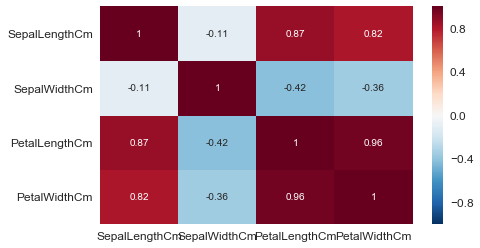

In [590]:
##############  5. Show the correlation matrix of the raw data  ###########################

plt.figure(figsize=(7,4)) 
sns.heatmap(iris_copy.corr(),annot=True) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [591]:
##################################  Notes ####################################

# Note in the above coorelation matrix heat map and the next set of plots 
# that the following 3 new features show strong correlation:
# 1. SepalLengthCm and PetalLengthCm are strongly correlated: corr = 0.871754
# 2. PetalWidthCm and SepalLengthCm are strongly correlated: corr = 0.817954
# 3. PetalWidthCm and PetalLengthCm are strongly correlated: corr = 0.962757

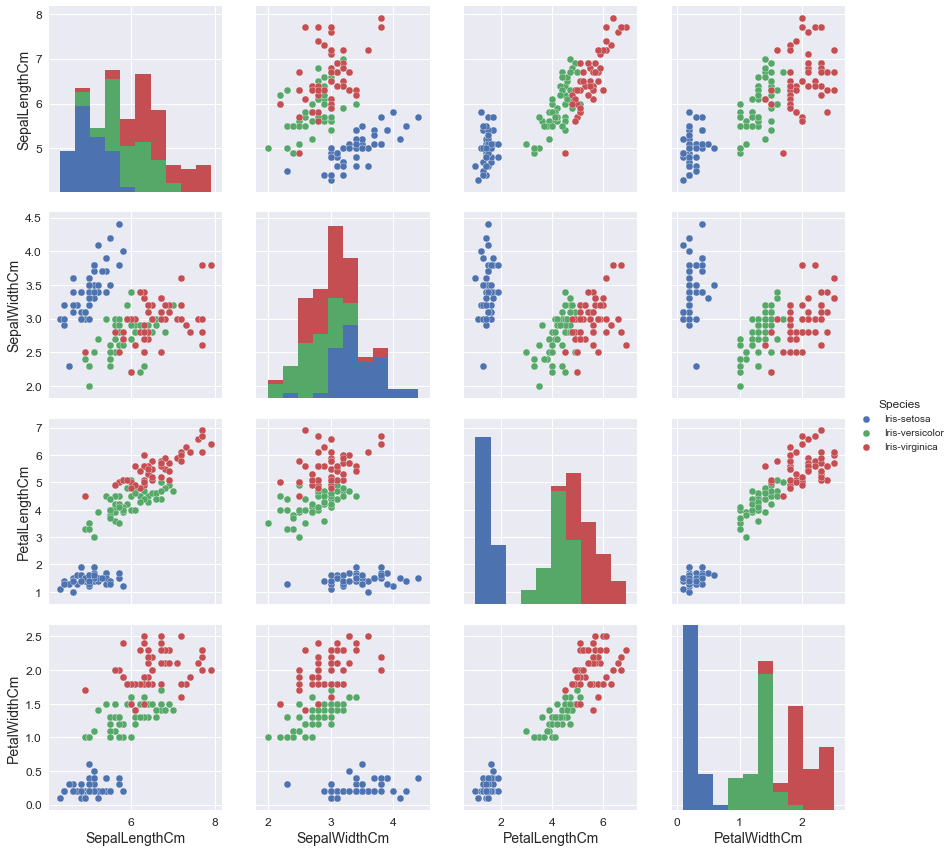

In [592]:
############### 6. Verify the pair-wise correlation among the features in the raw data  #########

sns.pairplot(iris_copy[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", 
                            "PetalWidthCm", "Species"]], hue="Species", size=3)
plt.show()

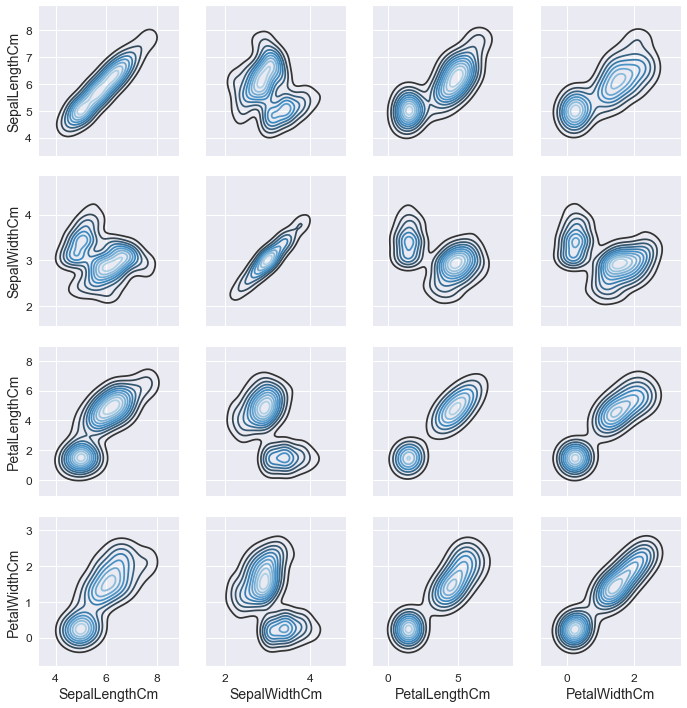

In [593]:
### 7. Plot to show the overlap in the data for features corresponding to different class labels (3 Iris species)
g = sns.PairGrid(iris_copy)
g.map(sns.kdeplot, cmap="Blues_d", legend=True)

plt.show()

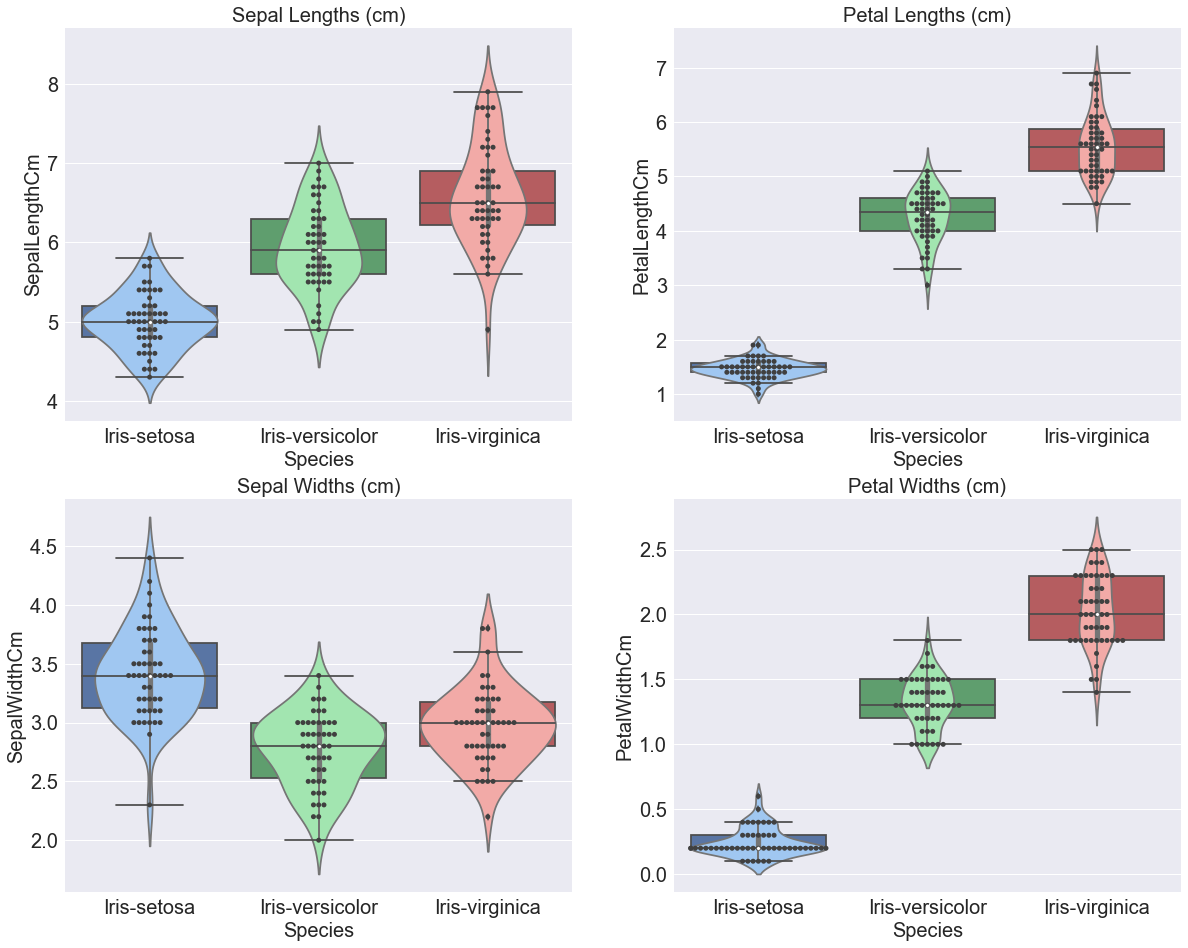

In [594]:
## 8. A combined box and violin plot to show the overlaps in features between the species 
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
#fig.tight_layout()

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

plt.subplot(221, xlabel='Species Names', ylabel='Sepal Lengths (cm)', title='Sepal Lengths (cm)')
ax1 = sns.boxplot(x="Species", y="SepalLengthCm", data=iris_copy)
ax1 = sns.swarmplot(x="Species", y="SepalLengthCm", data=iris_copy, color=".25")
g1 = sns.violinplot(x=iris_copy.Species, y=iris_copy.SepalLengthCm, palette="pastel")

for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(20)


plt.subplot(222, xlabel='Species Names', ylabel='Petal Lengths (cm)', title='Petal Lengths (cm)')
ax2 = sns.boxplot(x="Species", y="PetalLengthCm", data=iris_copy)
ax2 = sns.swarmplot(x="Species", y="PetalLengthCm", data=iris_copy, color=".25")
g2 = sns.violinplot(x=iris_copy.Species, y=iris_copy.PetalLengthCm, palette="pastel")

for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(20)
    

plt.subplot(223, xlabel='Species Names', ylabel='Sepal Widths (cm)', title='Sepal Widths (cm)')
ax3 = sns.boxplot(x="Species", y="SepalWidthCm", data=iris_copy)
ax3 = sns.swarmplot(x="Species", y="SepalWidthCm", data=iris_copy, color=".25")
g3 = sns.violinplot(x=iris_copy.Species, y=iris_copy.SepalWidthCm, palette="pastel")

for item in ([ax3.title, ax3.xaxis.label, ax3.yaxis.label] +
             ax3.get_xticklabels() + ax3.get_yticklabels()):
    item.set_fontsize(20)


plt.subplot(224, xlabel='Species Names', ylabel='Petal Widths (cm)', title='Petal Widths (cm)')
ax4 = sns.boxplot(x="Species", y="PetalWidthCm", data=iris_copy)
ax4 = sns.swarmplot(x="Species", y="PetalWidthCm", data=iris_copy, color=".25")
g4 = sns.violinplot(x=iris_copy.Species, y=iris_copy.PetalWidthCm, palette="pastel")

for item in ([ax4.title, ax4.xaxis.label, ax4.yaxis.label] +
             ax4.get_xticklabels() + ax4.get_yticklabels()):
    item.set_fontsize(20)

    
plt.show()

In [624]:
## 9. Feature engineering: create new features that might show stronger correlations
iris_copy = iris_copy.assign(SepalLen_PetalLen_ratio = iris_copy['SepalLengthCm']/iris_copy['PetalLengthCm'],
                 PetalWidth_SepalLen_ratio = iris_copy['PetalWidthCm']/iris_copy['SepalLengthCm'],
                 PetalWidth_PetalLen_ratio = iris_copy['PetalWidthCm']/iris_copy['PetalLengthCm']
                )
iris_copy.corr().sort_values(by = ['PetalWidth_PetalLen_ratio'], ascending=False)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,PetalWidth_PetalLen_ratio,PetalWidth_SepalLen_ratio,SepalLen_PetalLen_ratio
PetalWidth_PetalLen_ratio,0.645855,-0.339855,0.812959,0.910838,1.000000,0.937904,-0.805928
PetalWidth_SepalLen_ratio,0.713703,-0.425861,0.930692,0.982448,0.937904,1.000000,-0.914168
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.910838,0.982448,-0.896479
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.812959,0.930692,-0.934778
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.645855,0.713703,-0.698962
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.339855,-0.425861,0.588486
SepalLen_PetalLen_ratio,-0.698962,0.588486,-0.934778,-0.896479,-0.805928,-0.914168,1.000000


In [629]:
# 10. Subsettig the dataframe to include only the features selected above
iris_features = iris_copy[['PetalWidth_SepalLen_ratio', 'PetalWidth_PetalLen_ratio',
                          'PetalWidthCm', 'PetalLengthCm', 'SepalLen_PetalLen_ratio',
                          'Species']]
iris_features

,PetalWidth_SepalLen_ratio,PetalWidth_PetalLen_ratio,PetalWidthCm,PetalLengthCm,SepalLen_PetalLen_ratio,Species
0,0.039216,0.142857,0.2,1.4,3.642857,Iris-setosa
1,0.040816,0.142857,0.2,1.4,3.500000,Iris-setosa
2,0.042553,0.153846,0.2,1.3,3.615385,Iris-setosa
3,0.043478,0.133333,0.2,1.5,3.066667,Iris-setosa
4,0.040000,0.142857,0.2,1.4,3.571429,Iris-setosa
5,0.074074,0.235294,0.4,1.7,3.176471,Iris-setosa
6,0.065217,0.214286,0.3,1.4,3.285714,Iris-setosa
7,0.040000,0.133333,0.2,1.5,3.333333,Iris-setosa
8,0.045455,0.142857,0.2,1.4,3.142857,Iris-setosa
9,0.020408,0.066667,0.1,1.5,3.266667,Iris-setosa


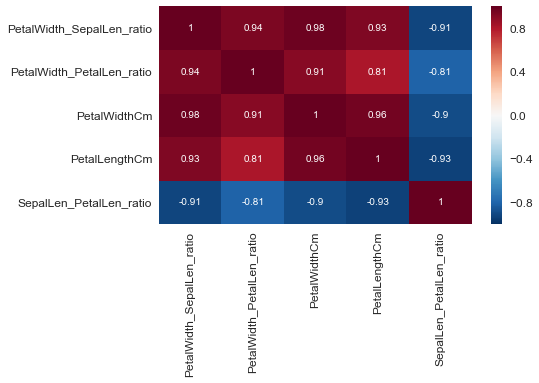

In [630]:
## 11.  Check in a correlation matrix if the newly created features show stronger correlation
plt.figure(figsize=(7,4)) 
sns.heatmap(iris_features.corr(),annot=True) #draws  heatmap with input as the correlation matrix
plt.show()

In [597]:
# Note from the above table and below plots the strong positive 
# or negative correlations: 
## [1] PetalWidth_SepalLen_ratio versus PetalWidth_PetalLen_ratio; corr = 0.937904; 
## [2] PetalWidthCm versus PetalWidth_PetalLen_ratio; corr = 0.910838; 
## [3] PetalWidthCm versus PetalWidth_SepalLen_ratio; corr = 0.982448; 
## [4] PetalLengthCm versus PetalWidth_SepalLen_ratio; corr = 0.930692; 
## [5] SepalLen_PetalLen_ratio versus PetalWidth_SepalLen_ratio; corr = -0.914168; 
## [6] PetalLengthCm versus SepalLen_PetalLen_ratio; corr = -0.934778

# These pairs of features show stronger correlations than among the 
# original features as noted earlier.
# Accordingly, the following features will be used for models: 
## PetalWidth_SepalLen_ratio, 
## PetalWidth_PetalLen_ratio, 
## PetalWidthCm, 
## SepalLen_PetalLen_ratio

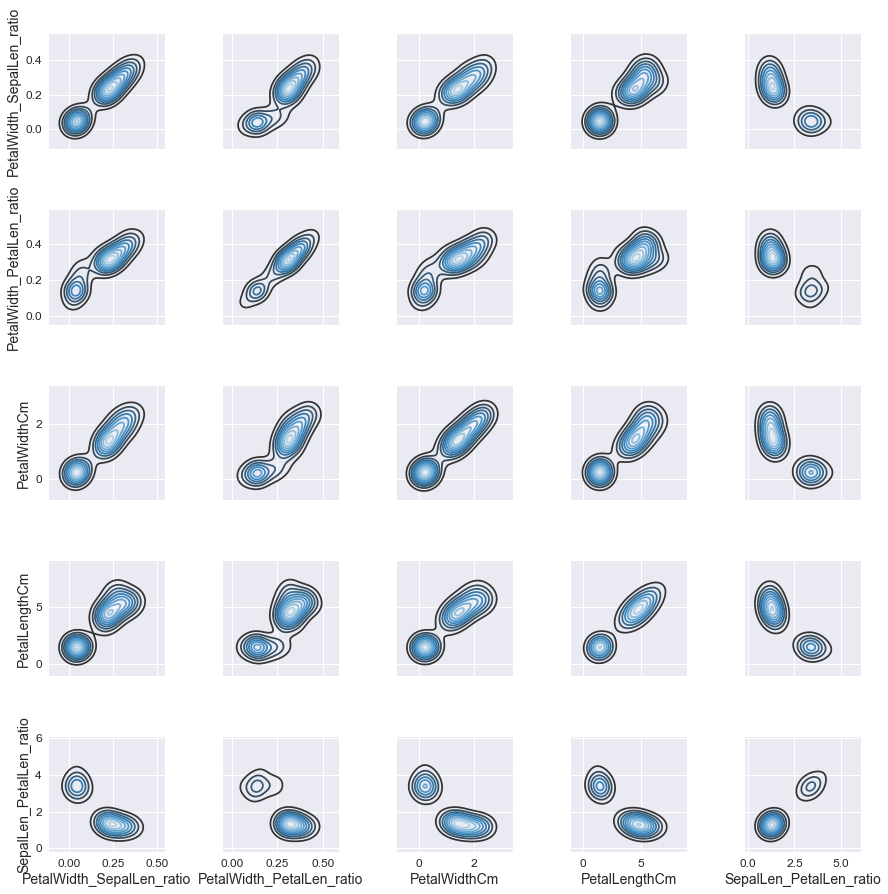

In [631]:
## 12. Plot to show show the improved correlations among the new features and also between new and some selected original features
g = sns.PairGrid(iris_features)
g.map(sns.kdeplot, cmap="Blues_d", legend=True)

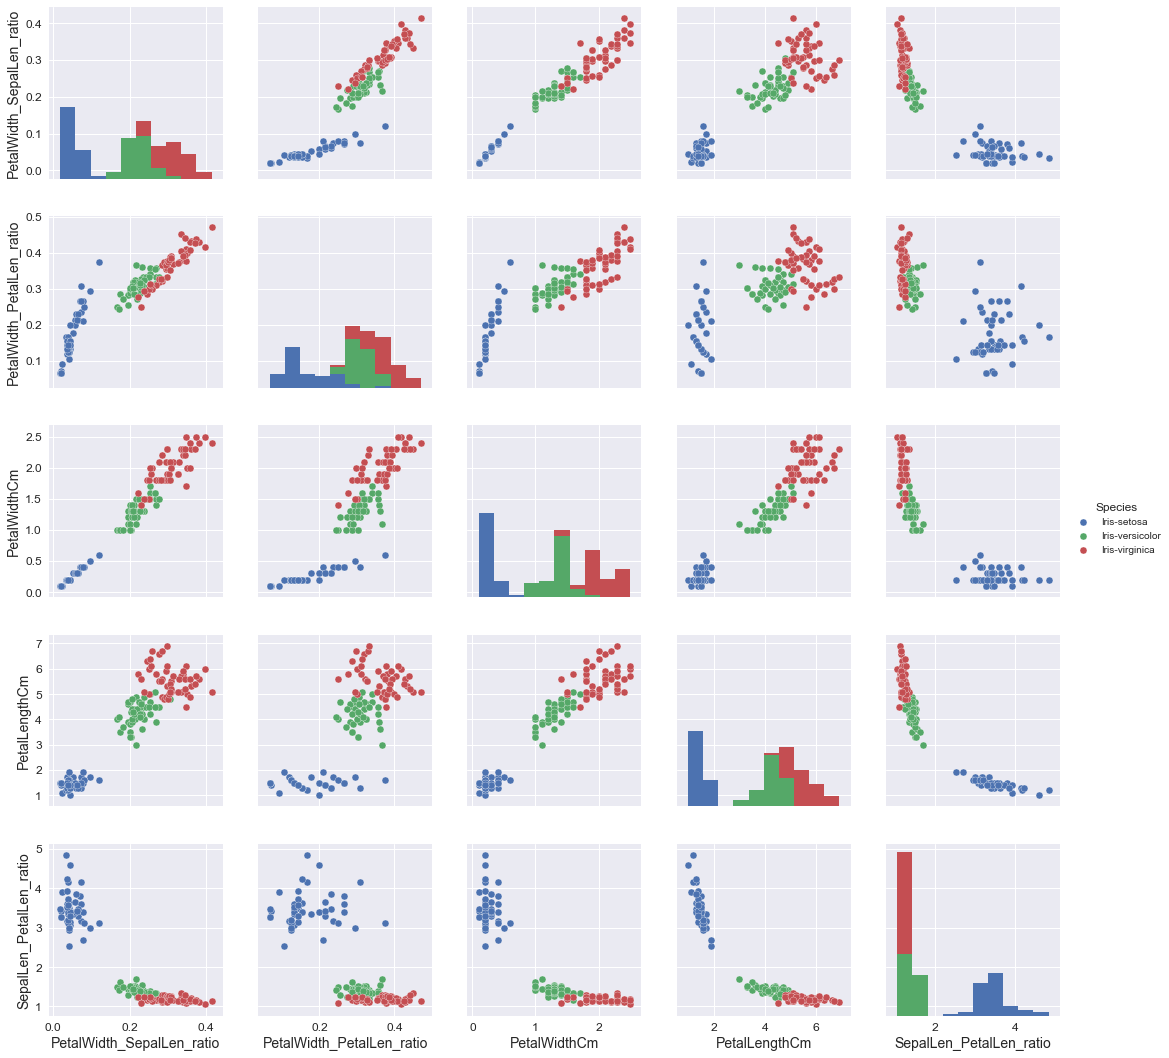

In [599]:
# 13. Plot the new features to visually check the correlations
plt.figure(figsize=(20,15))
sns.pairplot(iris_features[['PetalWidth_SepalLen_ratio', 'PetalWidth_PetalLen_ratio',
                           'PetalWidthCm', 'PetalLengthCm', 'SepalLen_PetalLen_ratio',
                            'Species']], hue="Species", size=3)
plt.show()

# The corr values for the new features show strong positive or negative correlation
### 1. PetalWidth_SepalLen_ratio versus PetalWidth_PetalLen_ratio; corr = 0.937904
### 2. PetalWidthCm versus PetalWidth_PetalLen_ratio; corr = 0.910838
### 3. PetalWidthCm versus PetalWidth_SepalLen_ratio; corr = 0.982448
### 4. PetalLengthCm versus PetalWidth_SepalLen_ratio; corr = 0.930692
### 5. SepalLen_PetalLen_ratio versus PetalWidth_SepalLen_ratio; corr = -0.914168
### 6. PetalLengthCm versus SepalLen_PetalLen_ratio; corr = -0.934778

In [600]:
# Let's take a closer look at couple of plots to see if the three different 
# species are now more linearly separable with the selected features

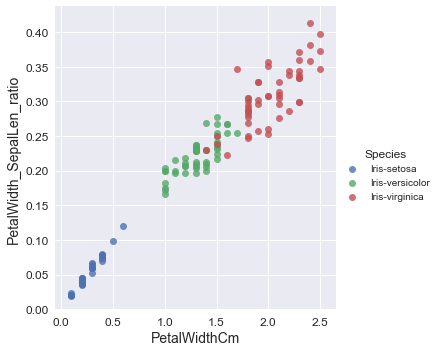

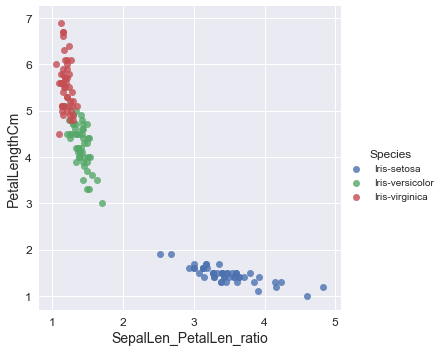

In [612]:
# 14. Plot to show stonger correlation (minimum overlap) between a new feature (ratio)
# and an original feature

sns.lmplot('PetalWidthCm', 'PetalWidth_SepalLen_ratio', data=iris_features, hue = "Species", fit_reg=False)
sns.lmplot('SepalLen_PetalLen_ratio', 'PetalLengthCm', data=iris_features, hue = "Species", fit_reg=False)

plt.show()

In [613]:
# 15. Import the models for the ML models and metrics
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [633]:
#### 16, Split the data into train and test datasets
final_dataset = iris_features
X = final_dataset.ix[:, :-1]
y = final_dataset.ix[:, 'Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [634]:
### 17. Logistic regression model
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
print("Predicting the value via LOGISTIC REGRESSION model.....\n")
t0 = time()
prediction=model_LR.predict(X_test)
print("Time taken to predict: %0.3fs" % (time() - t0))
score = model_LR.score(X_test, y_test)
print('The accuracy of this Logistic Regression model is %0.2f' %metrics.accuracy_score(prediction,y_test))
print('The score of the Logistic Regression is %0.2f\n' %score)

Predicting the value via LOGISTIC REGRESSION model.....

Time taken to predict: 0.001s
The accuracy of this Logistic Regression model is 0.97
The score of the Logistic Regression is 0.97



Confusion Matrix:

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  __all__
Actual                                                                
Iris-setosa                2                3               1        6
Iris-versicolor            0                0               0        0
Iris-virginica             0                0               0        0
__all__                    2                3               1        6


Overall Statistics:

Accuracy: 0.333333333333
95% CI: (0.043271868292741697, 0.77722190449648787)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.890625
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                               Iris-setosa Iris-versicolor  \
Population                                      6               6   
P: Condition positive                           6               0   
N: Condition negative                           0               6   
Test outcome positive                           2             

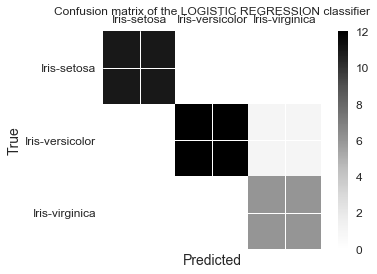

In [635]:
### 18. Model evaluation
from pandas_ml import ConfusionMatrix
import pylab as pl
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module='pandas_ml')

cm = ConfusionMatrix(y_test, prediction)
cm.plot
plt.show()
cm.print_stats()

### Plot the confusion matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm1 = confusion_matrix(y_test, prediction, labels)
#print(cm1)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm1)
pl.title('Confusion matrix of the LOGISTIC REGRESSION classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

In [642]:
### 19. SVM model
model_SVM = svm.SVC()
model_SVM.fit(X_train,y_train)
print("Predicting the value via SVM model.....\n")
t0 = time()
prediction_SVM=model_SVM.predict(X_test)
print("Time taken to predict: %0.3fs" % (time() - t0))
score_SVM = model_SVM.score(X_test, y_test)
print('The accuracy of the SVM model is %0.2f' %metrics.accuracy_score(prediction_SVM,y_test))
print('The score of the Logistic Regression is %0.2f\n' %score_SVM)

Predicting the value via SVM model.....

Time taken to predict: 0.001s
The accuracy of the SVM model is 1.00
The score of the Logistic Regression is 1.00



Confusion Matrix:

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  __all__
Actual                                                                
Iris-setosa                2                3               1        6
Iris-versicolor            0                0               0        0
Iris-virginica             0                0               0        0
__all__                    2                3               1        6


Overall Statistics:

Accuracy: 0.333333333333
95% CI: (0.043271868292741697, 0.77722190449648787)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.890625
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                               Iris-setosa Iris-versicolor  \
Population                                      6               6   
P: Condition positive                           6               0   
N: Condition negative                           0               6   
Test outcome positive                           2             

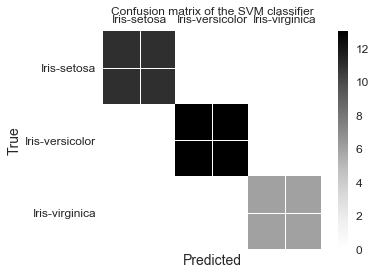

In [643]:
# 20. Confusion Matrix for SVM
cm_SVM = ConfusionMatrix(y_test, prediction_SVM)
cm_SVM.plot
plt.show()
cm_SVM.print_stats()

### Plot the confusion matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm1_SVM = confusion_matrix(y_test, prediction_SVM, labels)
#print(cm1)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm1_SVM)
pl.title('Confusion matrix of the SVM classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

In [644]:
### 21. Decision Tree Classifier model
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
print("Predicting the value via Decision Tree model.....\n")
t0 = time()
prediction_DT=model_DT.predict(X_test)
print("Time taken to predict: %0.3fs" % (time() - t0))
print('The accuracy of the Decision Tree Classifier is %0.2f' %metrics.accuracy_score(prediction_DT,y_test))
score_DT = model_DT.score(X_test, y_test)
print('The score of the Logistic Regression is %0.2f\n' %score_DT)

Predicting the value via Decision Tree model.....

Time taken to predict: 0.001s
The accuracy of the Decision Tree Classifier is 0.97
The score of the Logistic Regression is 0.97



Confusion Matrix:

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  __all__
Actual                                                                
Iris-setosa                2                3               1        6
Iris-versicolor            0                0               0        0
Iris-virginica             0                0               0        0
__all__                    2                3               1        6


Overall Statistics:

Accuracy: 0.333333333333
95% CI: (0.043271868292741697, 0.77722190449648787)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.890625
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                               Iris-setosa Iris-versicolor  \
Population                                      6               6   
P: Condition positive                           6               0   
N: Condition negative                           0               6   
Test outcome positive                           2             

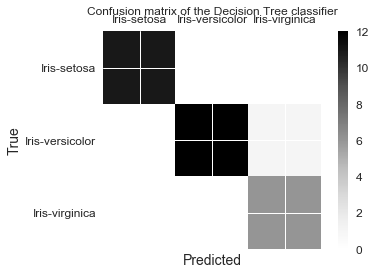

In [645]:
# 22. Confusion Matrix for Decision Tree
cm_DT = ConfusionMatrix(y_test, prediction_DT)
cm_DT.plot
plt.show()
cm_DT.print_stats()

### Plot the confusion matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm1_DT = confusion_matrix(y_test, prediction_DT, labels)
#print(cm1)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm1_DT)
pl.title('Confusion matrix of the Decision Tree classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

In [646]:
### 23. KNN Classifier model
model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train,y_train)
print("Predicting the value via K Nearest Neighbor model.....\n")
t0 = time()
prediction_KNN=model_KNN.predict(X_test)
print("Time taken to predict: %0.3fs" % (time() - t0))
print('The accuracy of the KNN Classifier is %0.2f' %metrics.accuracy_score(prediction_KNN,y_test))
score_KNN = model_KNN.score(X_test, y_test)
print('The score of the Logistic Regression is %0.2f\n' %score_KNN)

Predicting the value via K Nearest Neighbor model.....

Time taken to predict: 0.005s
The accuracy of the KNN Classifier is 1.00
The score of the Logistic Regression is 1.00



Confusion Matrix:

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  __all__
Actual                                                                
Iris-setosa                2                3               1        6
Iris-versicolor            0                0               0        0
Iris-virginica             0                0               0        0
__all__                    2                3               1        6


Overall Statistics:

Accuracy: 0.333333333333
95% CI: (0.043271868292741697, 0.77722190449648787)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.890625
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                               Iris-setosa Iris-versicolor  \
Population                                      6               6   
P: Condition positive                           6               0   
N: Condition negative                           0               6   
Test outcome positive                           2             

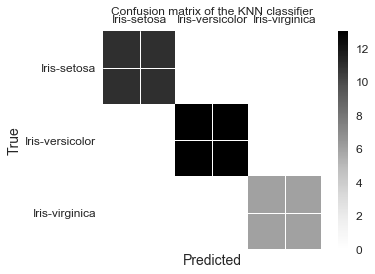

In [647]:
# 24. Confusion Matrix for KNN Model
cm_KNN = ConfusionMatrix(y_test, prediction_KNN)
cm_KNN.plot
plt.show()
cm_KNN.print_stats()

### Plot the confusion matrix
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm1_KNN = confusion_matrix(y_test, prediction_KNN, labels)
#
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm1_KNN)
pl.title('Confusion matrix of the KNN classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()